# Scaling of edge counts with population size

TH's plot of the edge counts $Y_{ij}$ between US state pairs and product of the population size of the state pair $n_in_j$ indicates that the scaling differs depending on whether $i=j$:
\begin{align}
Y_{ii}&\propto n_i,\\
Y_{ij}&\propto n_in_j.
\end{align}
This is also consonant with JH's plot of intra-SCI vs. population size, as normalizing the edge counts with the size of source and target region populations yields $\textrm{SCI}_{ii}\propto \frac{1}{n_i}$.
Here, we explore one mechanism by which such a scaling with population sizes might arise. Throughout this notebook, we only assume some spatial kernel $\kappa_{ij}$ for $i,j\in\mathcal{R}$, where $\mathcal{R}$ is the set of $m$ regions. (We ignore the social kernel for now, as it is not necessary for this mechanism.) That is, the likelihood of an edge between a person in regions $i$ and $j$ is given by $\kappa_{ij}$.

## Edge density and budgeting

First, we make the following observations about how the number of edges $E$ scales with the size of the network $n$.

1. If $\kappa_{ij}=O(1)$, then $E$ scales as $O(n^2)$, i.e. we have a "dense" network where the degree of every node is $O(n)$.
2. If $\kappa_{ij}=O(1/n)$, then $E$ scales as $O(n)$, i.e. we have a "sparse " network where the degree of every node is bounded $O(1)$.

For most social networks, it is reasonable to assume that the degree of nodes is bounded as the size of the network increases (imagine a social network of the entire world with billions of nodes, but nodes having bounded degrees of the order of tens to hundreds).

We model the edge counts between regions $i,j$, i.e. $Y_{ij}$, as Poisson distributed by parameter $\lambda_{ij}=\kappa_{ij}n_in_j$, where $n_i$ is the number of people in region $i$ such that the total population $n=\sum_in_i$. For the rest of the document, we will speak in terms of scaling of the expectation of $Y_{ij}$, i.e. of $\lambda_{ij}$. To obtain sparse scaling, we would have to assume
$$\kappa_{ij}\propto \frac{1}{n}=\frac{\theta_{ij}}{n},$$
where $\theta_{ij}$ is independent of $n$, which yields
$$\lambda_{ij}=\frac{\theta_{ij}n_in_j}{n},$$
such that the total (expected) number of edges in the network is
$$E=\sum_{i,j\in\mathcal{R}}\lambda_{ij}=\frac{\sum_{i,j\in\mathcal{R}}\theta_{ij}n_in_j}{n}<K\frac{\sum_{i,j\in\mathcal{R}}n_in_j}{n}=Kn,$$
i.e. $E=O(n)$ (where $K=\max(\theta_{11},\theta_{12},\cdots,\theta_{mm})$ is independent of $n$). The constant $K$ can be seen as an edge "budget": maximum number of edges a node can have in the network.

However, while this sparsity assumption gives us the correct scaling of $\kappa_{ij}\propto n_in_j$, it yields the wrong scaling of $\kappa_{ii}\propto n_i^2$. One way to rectify this is to impose sparsity via edge budgeting in appropriate subgraphs of the network, rather than in the whole network globally.

## Edge-induced subgraph
Let $P:\mathcal{R}\times\mathcal{R}\to\{1,2,\cdots,p\}$ be a mapping of region pairs to $p$ "budget partitions". $P$ can be seen as imposing a budget constraint on an edge-induced subgraph, induced by edges whose end-points lie in the region pairs mapped to $u\in\{1,2,\cdots,p\}$. Let $\mathcal{V}(u)$ refer to the set of nodes and $\mathcal{E}(u)$ refer to the set of edges in the subgraph corresponding to $u$. Then the sparsity constraint on $u$ is given by:
$$|\mathcal{E}(u)|=O(|\mathcal{V}(u)|),$$
where $|\cdot|$ indicates size.

Define the region set $R_u=\{i\in\mathcal{R} \textrm{ such that } \exists j\in\mathcal{R} \textrm{ such that } P(i,j)=u\}$ indicating the regions to which nodes in $\mathcal{V}(u)$ belong, and $R_u^i=\{j\in\mathcal{R} \textrm{ such that } P(i,j)=u\}$ indicate the subset of $R_u$ to which nodes with edges to/from region $i$ belong. Let $E(u)=\sum_{i\in R_u}\sum_{j\in R_u^i}n_in_j$ indicate the number of edges that can potentially exist over the node set $\mathcal{V}(u)$. (For simplicity, we allow self-loops but that's alright since they only contribute $O(|\mathcal{V}(u)|)$ edges, and each undirected edge is double-counted.) Then the desired sparse scaling can be achieved in $u$ by setting, for $i\in R_u,j\in R_u^i$:
$$\kappa_{ij}\propto\frac{|\mathcal{V}(u)|}{E(u)}=\frac{\theta_{ij}|\mathcal{V}(u)|}{E(u)},$$
as this yields the (expected) size of the edge set:
$$|\mathcal{E}(u)|=\sum_{i\in R_u}\sum_{j\in R_u^i}\lambda_{ij}=\frac{|\mathcal{V}(u)|\sum_{i\in R_u}\sum_{j\in R_u^i}\theta_{ij}n_in_j}{E(u)}<K_u|\mathcal{V}(u)|\frac{\sum_{i\in R_u}\sum_{j\in R_u^i}n_in_j}{\sum_{i\in R_u}\sum_{j\in R_u^i}n_in_j}=K_u|\mathcal{V}(u)|,$$
i.e. $|\mathcal{E}(u)|=O(|\mathcal{V}(u)|)$ (where $K_u=\max(\{\theta_{ij}\}_{i,j\in R_u})$ is independent of the size of the vertex set of the subgraph). The constant $K_u$ can be seen as an edge budget of the subgraph corresponding to $u$: maximum number of edges a node can have in the subgraph.

### Global edge budgeting
Considering the original setup of a global sparsity assumption is equivalent to assuming the trivial mapping $P:\mathcal{R}\times\mathcal{R}\to\{1\}$. That is, the original graph _is_ the only induced subgraph, and $|\mathcal{V}(1)|=n$, $E(u)=n^2$, yielding

\begin{align}
\kappa_{ij}&\propto\frac{1}{n}=\frac{\theta_{ij}}{n}\\
\implies\lambda_{ij}&=\frac{\theta_{ij}n_in_j}{n}
\end{align}

### Local-global edge budgeting
Consider the first non-trivial mapping $P:\mathcal{R}\times\mathcal{R}\to\{1,2,\cdots,m,m+1\}$, such that:
1. $\forall i: P(i,i) = i$,
2. $\forall i, \forall j\ne i: P(i,j) = m+1$.

That is, we divide the graph into $m$ subgraphs corresponding to within-region edges of each of the $m$ regions, and $1$ subgraph corresponding to (all) between-region edges. Then, the sparsity constraint on each of the within-region subgraphs can be seen as a "local" edge budget, while the sparsity constraint on the between-region subgraph can be seen as a "global" edge budget. Consequently, we have:

\begin{align}
|\mathcal{V}(i)|&=n_i,\\
E(i)&=n_i^2,\\
\implies\kappa_{ii}&\propto\frac{1}{n_i}=\frac{\theta_{ii}}{n_i}\\
\implies\lambda_{ii}&=\frac{\theta_{ii}n_i^2}{n_i}=\theta_{ii}n_i
\end{align}

Thus, we obtain the required scaling of within-region edge counts as $\propto n_i$. For between-region subgraph we have:

\begin{align}
|\mathcal{V}(m+1)|&=n,\\
E(m+1)&=\sum_in_i(n-n_i)=n^2-\sum_in_i^2,\\
\implies\kappa_{ij}&\propto\frac{1}{n-\sum_in_i^2/n}=\frac{\theta_{ij}}{n-\sum_in_i^2/n}\\
\implies\lambda_{ij}&=\frac{\theta_{ij}n_in_j}{n-\sum_in_i^2/n}
\end{align}

Thus, we obtain the required scaling of between-region edge counts as $\propto n_in_j$. We remark that applying edge budgeting does not invoke spatial homophily in any explicit manner, say of the kind $\lambda_{ii}>\lambda_{ij}$. Importantly, this scaling allows us to assume a model for $\theta_{ij}$'s, which is independent of population sizes.

### Hierarchical edge budgeting
Although a local-global differentiation is sufficient to explain the observed scaling, one can consider more interesting forms of recursive edge budgeting, especially when regions are expected to form a hierarchy of $l$ levels, say county-state-country of 3 levels. Let $Z_l(i)$ map the spatial unit $i$ to the appropriate spatial unit at level $l$, say if a certain county $i$ (level $0$) belongs to a certain state $s$ (level $1$) then $Z_1(i)=s$. (Naturally, $Z_0(i)$ is identity.) Let $n_l(\cdot)$ be the function indicating population size of units at level $l$, and $Q_l(\cdot)$ be the set of units at level $l-1$ mapped to the units at level $l$. Then, we can impose sparsity constraints on every level, which would assign budgets at all levels: from county, to state, to country. That is, for any county pair $i,j$, we

1. First identify the lowest level $L(i,j)$ for which they have the same membership, i.e. $L(i,j)=l$ such that $Z_{l-1}(i)\ne Z_{l-1}(j)$ and $Z_l(i)=Z_l(j)$.
2. Then, assume the sparsity constraint
$$\kappa_{ij}=
\begin{cases}
\theta_{ij}\left(n_l(Z_l(i))-\frac{\sum_{p\in Q_l(Z_l(i))}n_{l-1}(p)^2}{n_l(Z_l(i))}\right)^{-1} & \textrm{if } i\ne j,\\
\frac{\theta_{ii}}{n_0(i)}& \textrm{otherwise.}
\end{cases}
$$
If the units at level $l$ are composed of many units at level $l-1$, then one can assume $\sum_{p\in Q_l(Z_l(i))}n_{l-1}(p)^2\ll n_l(Z_l(i))^2$ and write:
$$\kappa_{ij}=\frac{\theta_{ij}}{n_l(Z_l(i))}$$
with the parametrization $L(i,i)=0$.

### Distance-based edge budgeting
We consider a scenario where the spatial hierarchy is organized based on distance in some (physical) space, which will yield a spatial kernel defined in terms of the distance between two locations. This is equivalent to bounding the number of links to locations that lie within some (sequence of) distance(s).

For simplicity, assume a uniformly distribution population by density $\rho$ on a 2D plane. The distance $d$ between two locations is given by the taxicab metric. Consider any arbitrary location $i$, and assume the circle of radius $r$ around $i$ to define the finest spatial unit (say a county). We define a "levels-structure" around this county, where the zeroth level is the county itself, the first level may correspond to a collective of neighbouring counties, the second level may correspond to a state, the third level may correspond to a collection of neighbouring states, and so forth. The idea is to budget the number of edges that the location $i$ has to each of these nested levels. The resolution of this nested levels-structure is given by $k$, such that the location $j$ is at level $p$ when
\begin{equation}
rk^{p-1}\le d_{ij}< rk^p.
\end{equation}
By default, locations satisfying $0\le d_{ij}<r$ are in level $0$, i.e. the county itself. This structure is equivalent to assuming that a collection of $k^2$ units at level $p$ form a single unit at level $p+1$. For instance, if $k$ is very large, of the order of the square root of number of counties in the country, then this would roughly yield a 2-level hierarchical structure (the local-global edge budgeting scenario). From the equation above, one can write:
\begin{equation}
L(i,j)=1+\left\lfloor\log_k\left(\frac{d_{ij}}{r}\right)\right\rfloor
\end{equation}

To apply recursive edge-budgeting here, we note that the area of a circle of radius $d$ is given by $2d^2$. Thus, the area covered by level $p$ is given by $$A_p=2(rk^p)^2.$$For a location $j$ such that $L(i,j)=p$, $p>0$, the appropriate spatial kernel is given by:
\begin{align}
\kappa_{ij}&\propto\left(\rho A_p-\rho\frac{k^2A_{p-1}^2}{A_p}\right)^{-1}=\left(\rho A_p(1-k^{-2})\right)^{-1}
\end{align}

From the equation above, we know that
\begin{align}
p=L(i,j)&=1+\log_k\left(\frac{d_{ij}}{r}\right)-\left\lbrace\log_k\left(\frac{d_{ij}}{r}\right)\right\rbrace\\
\implies A_p&=2r^2k^{2p}=2d_{ij}^2k^{2\epsilon},
\end{align}
where $\epsilon=1-\left\lbrace\log_k\left(\frac{d_{ij}}{r}\right)\right\rbrace$ lies in $(0,1]$. Consequently, the spatial kernel is given by
\begin{align}
\kappa_{ij}=\theta_{ij}\left(2\rho d_{ij}^2k^{2\epsilon}(1-k^{-2})\right)^{-1}
\end{align}
Therefore, we obtain a distance decay relationship that $\kappa_{ij}\propto d_{ij}^{-2}$. That is, edge budgeting provides a purported mechanism for spatial homophily to emerge.

For layer $0$, one can write:
\begin{align}
\kappa_{ii}=\frac{\theta_{ii}}{2\rho r^2}\equiv \frac{\theta_{ii}}{n_i}
\end{align},

where $n_i=2\rho r^2$ is the number of people in county with centroid at $i$. Thus, we would obtain the expected scaling behaviour $\lambda_{ii}\propto n_i$. However, as the distance $d_{ij}$ from $i$ increases, the number of people within a distance $d_{ij}$ ($\propto d_{ij}^2$) becomes less and less correlated to the number of people at any given location $j$, which will yield $\lambda_{ij}\propto n_in_j$

### Location-based edge budgeting

While assuming uniform population density shows how spatial homophily (distance decay of the connectivity kernel) emerges out of edge budgeting, it cannot be assumed in practice. Instead, when considering the connectivity between two locations $i$ and $j$ ("counties"), we can suppose a levels-structure where the scale $k$ is proportionate to the distance between the locations: $k=d_{ij}/r$. Consequently, an imagined "state" (level $1$) is given by the union of two circles of radius $d_{ij}$ each, centered around $i$ and $j$ respectively. (As before, we let level $0$ be the county's area itself.) Let $R_i(d)\subset\mathcal{R}$ denote the regions that fall within a distance $d$ from location $i$, and let $n(\cdot)$ indicate the number of people in a region. Then the connectivity kernel between $i,j$ is given by:
\begin{align}
\kappa_{ij}=\frac{\theta_{ij}}{n\left(R_i(d_{ij})\cup R_j(d_{ij})\right)-(n_i+n_j)}\approx\frac{\theta_{ij}}{n\left(R_i(d_{ij})\cup R_j(d_{ij})\right)},
\end{align}
where the approximation holds for any two locations on average.

## Verifying edge count scaling

Below, we simulate local-global edge budgeting on the US counties, assuming a simple spatial kernel where $\theta_{ii}=100$ and $\theta_{ij}=10$.

In [111]:
%matplotlib inline

In [37]:
def import_synthetic_sci(datadir='dat/synthetic_sci/', spatial=True, heterogeneous=False, results=False, sum_pop=True):
    filename = 'poisson-'
    if spatial: filename += 'spatial-'
    if heterogeneous: filename += 'heterogeneous'
    else: filename += 'homogeneous'
    filename += '_usage.pkl'
    from src.utils.generic import load_obj
    import os
    out = load_obj(os.path.join(datadir, filename))
    if not results:
        for key in ['args', 'aggregate_connections', 'member_counts']: del out[key]
    if sum_pop:
        out['county_counts'] = out['county_counts'].sum(-1).sum(-1).sum(-1)
    return out

In [38]:
syn_sci = import_synthetic_sci()

In [39]:
syn_sci.keys()

dict_keys(['county_counts', 'county_coordinates', 'sci', 'fips_index'])

In [108]:
class UpperTriangleIndex(object):
    """
    Helper class to convert indices of upper triangular matrix to a flat vector representation.
    """
    def __init__(self, n, size=False):
        self.set_n(n, size)
        self.last = len(self)-1
        
    def set_n(self, n, size):
        if size:
            assert(size>0)
            import numpy as np
            tmp = np.sqrt(1+8*n)
            if tmp!=int(tmp): raise ValueError('invalid size %s'%str(n))
            tmp = int(tmp)-1
            if tmp%2: raise ValueError('invalid size %s'%str(n))
            else: self.n = int(tmp//2)
        else:
            assert(isinstance(n, int) and n>0)
            self.n = n
        
        
    def __len__(self): return self.n*(self.n+1)//2
        
    def tri_to_flat(self, i, j):
        return (i*(2*self.n-1-i))//2 + j
    
    def flat_to_tri(self, idx, i):
        return idx%((i*(2*self.n-1-i))//2)
    
    def __iter__(self):
        self._idx = -1
        return self
    
    def __next__(self):
        if self._idx<self.last:
            self._idx += 1
            return self._idx
        else:
            raise StopIteration
            
    def get_diag(self):
        idx = [False]*len(self)
        for i in range(self.n):
            idx[self.tri_to_flat(i, i)] = True
        return idx

In [183]:
def sample_spatial_ard(pop, p_self=100, p_other=10, seed=12345):
    import numpy as np
    pop = np.array(pop)
    num = len(pop)
    pop_sum = pop.sum()
    pop_sum -= (pop**2).sum()/pop_sum
    ard = np.zeros(num*(num+1)//2)
    idx = iter(UpperTriangleIndex(num))
    seed = np.random.RandomState(seed=seed)
    for i in range(num):
        ard[next(idx)] = seed.poisson(p_self*pop[i])
        for j in range(i+1, num):
            ard[next(idx)] = seed.poisson(p_other*pop[i]*pop[j]/pop_sum)
    return ard

In [184]:
spatial_ard_100_10 = sample_spatial_ard(syn_sci['county_counts'])

In [131]:
def fit_line(x, y=None, p=None):
    from scipy.optimize import curve_fit
    import numpy as np
    def foo(x, m, c): return m*x + c
    if y is not None:
        popt, pcov = curve_fit(foo, x, y)
        sigma = np.sqrt(np.diag(pcov))
        pcorr = pcov/(sigma[:, None]*sigma[None, :])
        return popt, pcorr
    elif p is not None:
        return foo(x, *p)

In [178]:
def plot_ard_by_pop(ard, pop):
    import matplotlib.pyplot as plt
    import numpy as np
    def get_line(x, y):
        log_x, log_y = np.log2(x), np.log2(y)
        p, _ = fit_line(log_x, log_y)
        log_xs = np.linspace(log_x.min(), log_x.max(), 100)
        log_ys = fit_line(log_xs, p=p)
        return 2**log_xs, 2**log_ys, p[0]
    idx = iter(UpperTriangleIndex(len(ard), size=True))
    x = np.zeros(len(idx))
    for i in range(idx.n):
        for j in range(i, idx.n):
            x[next(idx)] = pop[i]*pop[j]
    fig, ax = plt.subplots(figsize=(4, 3), dpi=180)
    idx_diag = np.array(idx.get_diag())
    colors = ['tab:blue', 'tab:red']
    x_, y_ = x[idx_diag], ard[idx_diag]
    ax.loglog(x_, y_, marker='o', linestyle='', alpha=0.5, markersize=0.5, label='Within region', c=colors[0])
    x_, y_, p = get_line(x_, y_)
    ax.loglog(x_, y_, linestyle='--', c='black', label='Slope = %.2f'%p)
    idx_ = np.logical_and(~idx_diag, ard) # prevent log(0)
    x_, y_ = x[idx_], ard[idx_]
    ax.loglog(x_, y_, marker='o', linestyle='', alpha=0.5, markersize=0.5, label='Between region', c=colors[1])
    x_, y_, p = get_line(x_, y_)
    ax.loglog(x_, y_, linestyle=':', c='black', label='Slope = %.2f'%p)
    ax.set_xlabel('$n_in_j$')
    ax.set_ylabel('ARD $Y_{ij}$')
    ax.legend()

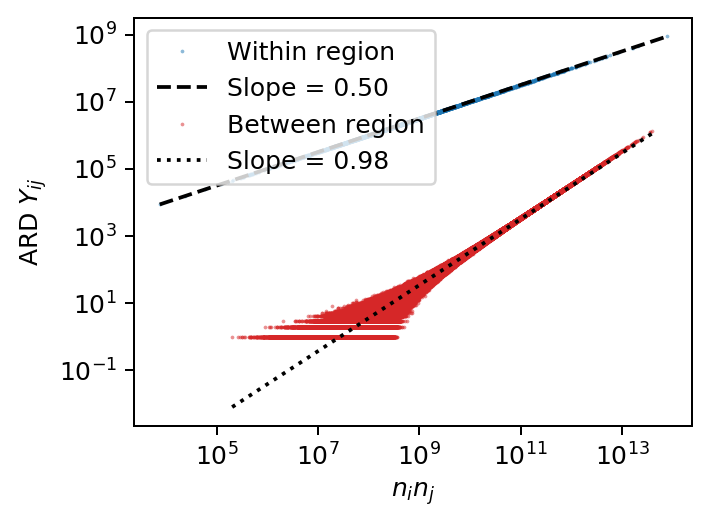

In [185]:
plot_ard_by_pop(spatial_ard_100_10, syn_sci['county_counts'])